In [1]:
install.packages("kableExtra", dependencies = TRUE)


also installing the dependencies ‘websocket’, ‘chromote’, ‘magick’, ‘webshot2’


Warning message in install.packages("kableExtra", dependencies = TRUE):
“installation of package ‘websocket’ had non-zero exit status”
Warning message in install.packages("kableExtra", dependencies = TRUE):
“installation of package ‘magick’ had non-zero exit status”
Warning message in install.packages("kableExtra", dependencies = TRUE):
“installation of package ‘chromote’ had non-zero exit status”
Warning message in install.packages("kableExtra", dependencies = TRUE):
“installation of package ‘webshot2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(haven)
library(stargazer)
library(dplyr)
library(infer)
library(ggplot2)
library(broom)
library(knitr)
library(kableExtra)



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




In [3]:
data <- read_dta("./cen_ind_2021_pumf_v2.dta")

In [4]:
# simple regression 1 - CFInc (Income) based on Gentstat (First Gen / Second Gen Canadian)


reg_1 <-  lm(CFInc ~ genstat, data = data)

stargazer(reg_1, type = "text")



                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                       0.411***           
                               (0.006)           
                                                 
Constant                      20.798***          
                               (0.021)           
                                                 
-------------------------------------------------
Observations                   980,868           
R2                              0.004            
Adjusted R2                     0.004            
Residual Std. Error      8.944 (df = 980866)     
F Statistic         4,277.340*** (df = 1; 980866)
Note:                 *p<0.1; **p<0.05; ***p<0.01


In [5]:
# simple regression 2 - adding covariates for Gender and agegrp 

reg_2 <-  lm(CFInc ~ genstat + Gender + agegrp, data = data)

stargazer(reg_2, type = "text")



                         Dependent variable:     
                    -----------------------------
                                CFInc            
-------------------------------------------------
genstat                       0.395***           
                               (0.006)           
                                                 
Gender                        0.481***           
                               (0.018)           
                                                 
agegrp                        -0.142***          
                               (0.001)           
                                                 
Constant                      21.790***          
                               (0.037)           
                                                 
-------------------------------------------------
Observations                   980,868           
R2                              0.018            
Adjusted R2                     0.018            

In [6]:
# simple regression 3 - adding covariates for hdgree (education level) and lfact (labour force participation)

reg_3 <-  lm(CFInc ~ genstat + Gender + agegrp + hdgree + lfact, data = data)

stargazer(reg_3, type = "text")



                         Dependent variable:      
                    ------------------------------
                                CFInc             
--------------------------------------------------
genstat                        0.430***           
                               (0.006)            
                                                  
Gender                         0.371***           
                               (0.017)            
                                                  
agegrp                        -0.094***           
                               (0.001)            
                                                  
hdgree                         0.274***           
                               (0.001)            
                                                  
lfact                         -0.271***           
                               (0.001)            
                                                  
Constant                      

In [7]:
# simple regression 4 - by pr (province)

reg_4 <-  lm(CFInc ~ genstat + Gender + agegrp + hdgree + lfact + pr, data = data)

stargazer(reg_4, type = "text")




                         Dependent variable:      
                    ------------------------------
                                CFInc             
--------------------------------------------------
genstat                        0.461***           
                               (0.006)            
                                                  
Gender                         0.371***           
                               (0.017)            
                                                  
agegrp                        -0.094***           
                               (0.001)            
                                                  
hdgree                         0.274***           
                               (0.001)            
                                                  
lfact                         -0.270***           
                               (0.001)            
                                                  
pr                            

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


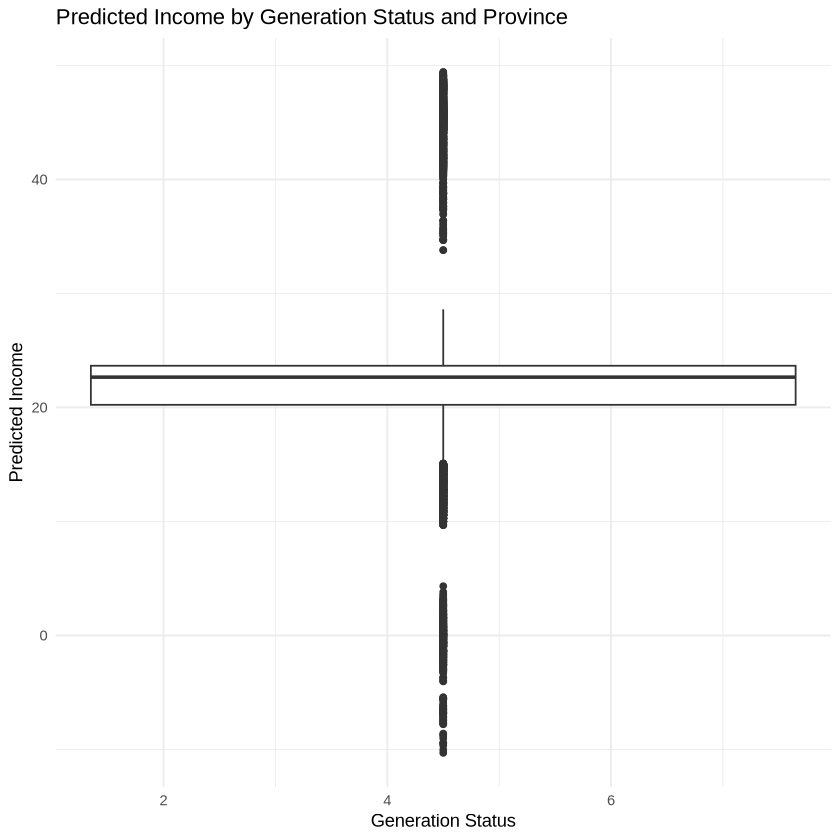

In [8]:
# some useful ? visualisations 

data$predicted <- predict(reg_4)
ggplot(data, aes(x = genstat, y = predicted, color = pr)) +
  geom_boxplot() +
  labs(title = "Predicted Income by Generation Status and Province",
       x = "Generation Status", y = "Predicted Income") +
  theme_minimal()


In [ ]:
# checking for interaction effects 

reg_interaction <- lm(CFInc ~ genstat * hdgree + genstat * lfact + pr + Gender + agegrp, data = data)


stargazer(reg_interaction, type = "text")


In [9]:
# Extract R² values
r_squared_values <- c(summary(reg_1)$r.squared, 
                      summary(reg_2)$r.squared, 
                      summary(reg_3)$r.squared,
                      summary(reg_4)$r.squared)

In [10]:
r_squared_contributions<- diff(r_squared_values)

In [13]:
# Extract coefficients for wt from each model
coef_wt <- c(coef(reg_1)["genstat"], coef(reg_2)["genstat"], coef(reg_3)["genstat"], coef(reg_4)["genstat"])


In [15]:
# Extract standard errors for wt
se_wt <- c(summary(reg_1)$coefficients["genstat", "Std. Error"], 
           summary(reg_2)$coefficients["genstat", "Std. Error"], 
           summary(reg_3)$coefficients["genstat", "Std. Error"], 
           summary(reg_4)$coefficients["genstat", "Std. Error"])


In [17]:
# Create a regression waterfall table
waterfall_table <- data.frame(
  Step = c("Baseline (genstat)", "Add Gender", "Add agegrp", "Add hdgree"),
  `Coefficient (genstat)` = round(coef_wt, 3),
  `Std. Error` = round(se_wt, 3)

ERROR: Error in parse(text = input): <text>:6:0: unexpected end of input
4:   `Coefficient (genstat)` = round(coef_wt, 3),
5:   `Std. Error` = round(se_wt, 3)
  ^


In [18]:
waterfall_table <- data.frame(
  Step = c("Baseline (genstat)", "Add Gender", "Add agegrp", "Add hdgree"),
  `Coefficient (genstat)` = round(coef_wt, 3),  
  `Std. Error` = round(se_wt, 3)  
)


In [19]:
# Print a nicely formatted table
kable(waterfall_table, format = "html", align = "c") %>%
  kable_styling(full_width = FALSE, bootstrap_options = c("striped", "hover"))

<table class="table table-striped table-hover" style="width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:center;"> Step </th>
   <th style="text-align:center;"> Coefficient..genstat. </th>
   <th style="text-align:center;"> Std..Error </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:center;"> Baseline (genstat) </td>
   <td style="text-align:center;"> 0.411 </td>
   <td style="text-align:center;"> 0.006 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> Add Gender </td>
   <td style="text-align:center;"> 0.395 </td>
   <td style="text-align:center;"> 0.006 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> Add agegrp </td>
   <td style="text-align:center;"> 0.430 </td>
   <td style="text-align:center;"> 0.006 </td>
  </tr>
  <tr>
   <td style="text-align:center;"> Add hdgree </td>
   <td style="text-align:center;"> 0.461 </td>
   <td style="text-align:center;"> 0.006 </td>
  </tr>
</tbody>
</table>

In [20]:
# Basic regressions
model1 <- lm(CFInc ~ genstat, data = data)
model2 <- lm(CFInc ~ genstat + Gender, data = data)
model3 <- lm(CFInc ~ genstat + Gender + agegrp, data = data)
model4 <- lm(CFInc ~ genstat + Gender + agegrp + hdgree, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4, 
          type = "text", 
          title = "Income on Generational Status",
          dep.var.labels = "Dependent Variable: CFInc",
          covariate.labels = c("genstat", "Gender", "agegrp", "hdgree"),
          omit.stat = c("f", "ser"),
          digits = 3)



Regression Waterfall Table
                       Dependent variable:          
             ---------------------------------------
                    Dependent Variable: CFInc       
                (1)       (2)       (3)       (4)   
----------------------------------------------------
genstat      0.411***  0.410***  0.395***  0.387*** 
              (0.006)   (0.006)   (0.006)   (0.006) 
                                                    
Gender                 0.527***  0.481***  0.481*** 
                        (0.018)   (0.018)   (0.018) 
                                                    
agegrp                           -0.142*** -0.116***
                                  (0.001)   (0.001) 
                                                    
hdgree                                     0.010*** 
                                           (0.0003) 
                                                    
Constant     20.798*** 20.016*** 21.790*** 21.304***
              (0.0

In [4]:
#indivuals age 12-20
data <- data %>%
  mutate(agegrp_dummy = ifelse(agegrp %in% c("5", "6", "7"), 1, 0))

In [5]:
#degree status on genstat 
# should be careful, meaning of hdgree is problematic 
model1 <- lm(hdgree ~ genstat, data = data)
model2 <- lm(hdgree ~ genstat + Gender, data = data)
model3 <- lm(hdgree ~ genstat + Gender + agegrp, data = data)
model4 <- lm(hdgree ~ genstat + Gender + agegrp + lfact*agegrp_dummy, data = data)

# Stargazer Table Output
stargazer(model1, model2, model3, model4, 
          type = "text", 
          title = "Degree on Generational Status",
          dep.var.labels = "Dependent Variable: CFInc",
          covariate.labels = c("genstat", "Gender", "agegrp", "hdgree"),
          omit.stat = c("f", "ser"),
          digits = 3)


Regression Waterfall Table
                             Dependent variable:           
                   ----------------------------------------
                          Dependent Variable: CFInc        
                      (1)       (2)       (3)       (4)    
-----------------------------------------------------------
genstat            1.119***  1.117***  0.844***  -0.043*** 
                    (0.025)   (0.025)   (0.021)   (0.005)  
                                                           
Gender                       0.787***   -0.057    0.399*** 
                              (0.071)   (0.060)   (0.016)  
                                                           
agegrp                                 -2.608*** -0.362*** 
                                        (0.004)   (0.001)  
                                                           
hdgree                                            0.928*** 
                                                  (0.0003) 
            